In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from IPython.display import display
import os
import cPickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Helper Funactions

In [2]:
def load_pickles(directory, exclude=[]):
    logs = []
    pickles = []
    files = os.listdir(directory)
    for i in range(len(exclude)):
        exclude[i] = 'pickle_' + exclude[i]
    for file in files:
        if file.startswith('pickle_'):
            if not (file in exclude):
                pickles.append(file)
    pickles.sort(key=lambda x: x.replace('_', '0'))
    for pickle in pickles:
        log = cPickle.load(open(pickle, 'rb'))
        logs.append(log)
    return logs

def show_summary(logs):
    summary_df = pd.DataFrame(columns=['model', 'test accuracy', 'max ave validation accuracy', 
                                       'time till best', 'steps till best', 'time per 100 steps', 'time total'])
    for log in logs:
        model = log['pickle_file'].replace('pickle_', '')

        try:
            test = str(round(log['test_accuracy'] * 100, 2)) + '%'
        except:
            test = 'n/a'

        max_ave_val = str(round(log['max_ave_validation_accuracy']['accuracy'] * 100, 2)) + '%'

        index_best_model = log['steps'].index(log['max_ave_validation_accuracy']['step'])
        time_till_best_model = log['end_time'][index_best_model] - log['train_start']
        time_till_best_model = str(time_till_best_model.days) + ' day ' + str(round(time_till_best_model.seconds / 60 / 60, 1)) + ' hr'
        #time_till_best_model = str(time_till_best_model.seconds)

        steps_till_best_model = log['steps'][index_best_model]
        
        time_per_logevery = (log['end_time'][501] - log['end_time'][500])
        time_per_logevery = str(time_per_logevery.seconds + round(time_per_logevery.microseconds / 1000 / 1000, 3)) + ' sec'

        time_total = log['end_time'][-1] - log['end_time'][0]
        time_total = str(time_total.days) + ' day ' + str(round(time_total.seconds / 60 / 60, 1)) + ' hr'

        log_df = pd.DataFrame({'model': [model], 
                               'test accuracy': [test], 
                               'max ave validation accuracy': [max_ave_val], 
                               'time till best': [time_till_best_model], 
                               'steps till best': [steps_till_best_model],
                               'time per 100 steps': [time_per_logevery], 
                               'time total': [time_total]})
        
        summary_df = pd.concat([summary_df, log_df])
    
    summary_df = summary_df[['model', 'test accuracy', 'max ave validation accuracy', 
                             'time till best', 'steps till best', 'time per 100 steps', 'time total']]
    
    display(summary_df)
    
def show_graph(logs, ave_validation=True, steps=True, xmin=0, xmax=1000, ymin=0.0, ymax=1.0):
    if ave_validation:
        value = 'ave_validation'
        title = 'Ave Validation Accuracy'
    else:
        value = 'validation'
        title = 'Validation Accuracy'
    
    if steps:
        xlabel = 'Steps'
    else:
        xlabel = 'Epochs'

    for log in logs:
        index_max_value = log[value].index(max(log[value]))
        if steps:
            x = np.array(log['steps']).astype(np.float32)
            x_max_ave_val = log['steps'][index_max_value]
        else:
            x = np.array(log['steps']).astype(np.float32) * log['variables']['batch_size'] / log['variables']['train_data_size']
            x_max_ave_val = log['steps'][index_max_value] * log['variables']['batch_size'] / log['variables']['train_data_size']
        plt.plot(x, log[value],
                 label=log['pickle_file'].replace('pickle_', ''))
        #plt.axvline(x=x_max_ave_val, color='#808080', linestyle='--')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend(bbox_to_anchor=(1.5, 1), fontsize=10)
    plt.xlim(xmin=xmin, xmax=xmax)
    plt.ylim(ymin=ymin, ymax=ymax)

    plt.show

## Log Analysis

In [3]:
logs = load_pickles('.', exclude=[])
show_summary(logs)

,model,test accuracy,max ave validation accuracy,time till best,steps till best,time per 100 steps,time total
0,model_01_run01,54.82%,54.89%,0 day 0.8 hr,47400.0,5.163 sec,0 day 2.0 hr
0,model_02_run01,74.07%,74.42%,0 day 1.0 hr,64500.0,5.169 sec,0 day 2.0 hr
0,model_03_run01,74.51%,75.46%,0 day 1.2 hr,67700.0,5.634 sec,0 day 2.1 hr
0,model_04_run01,77.15%,78.43%,0 day 0.2 hr,8500.0,5.45 sec,0 day 1.0 hr
0,model_04_run02,80.2%,80.72%,0 day 0.3 hr,14600.0,5.393 sec,0 day 1.0 hr
0,model_05_run01,82.62%,83.75%,0 day 0.5 hr,28500.0,5.386 sec,0 day 1.0 hr
0,model_06_run01,86.17%,86.7%,0 day 6.6 hr,230100.0,9.749 sec,0 day 8.1 hr
0,model_07A_run01,86.9%,87.25%,0 day 23.6 hr,618900.0,13.312 sec,1 day 0.1 hr
0,model_07B_run01,87.05%,88.28%,1 day 0.8 hr,692600.0,12.559 sec,1 day 0.9 hr
0,model_08_run01,86.15%,86.87%,0 day 2.5 hr,43200.0,18.401 sec,0 day 5.0 hr


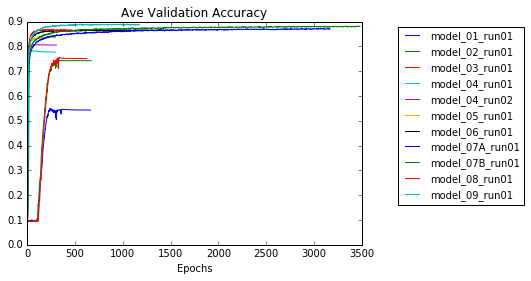

In [4]:
show_graph(logs, ave_validation=True, steps=False, xmin=0, xmax=3500, ymin=0.0, ymax=0.9)

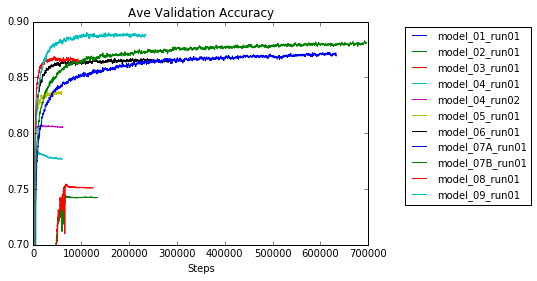

In [5]:
show_graph(logs, ave_validation=True, steps=True, xmin=0, xmax=700000, ymin=0.7, ymax=0.9)

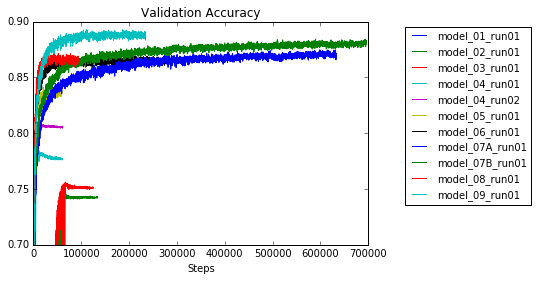

In [6]:
show_graph(logs, ave_validation=False, steps=True, xmin=0, xmax=700000, ymin=0.7, ymax=0.9)